In [1]:
from PIL import Image
from keras.models import load_model
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from matplotlib import pyplot as plt
import numpy as np
import os
from tqdm import tqdm

2023-12-31 17:59:31.805449: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-31 17:59:32.195848: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-31 17:59:32.203277: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-12-31 17:59:32.203302: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [2]:
# model = load_model('./numLayers-2_numUnits-32_dropout-0.2_optimizer-adam_activation-relu_lr-0.0011703880150.h5')
model = load_model('./numLayers-2_numUnits-32_dropout-0.2_optimizer-adam_activation-relu_lr-0.0011704067059.h5')

2023-12-31 17:59:40.631107: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-12-31 17:59:40.631142: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-12-31 17:59:40.631173: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (blankk): /proc/driver/nvidia/version does not exist
2023-12-31 17:59:40.631615: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Load MobileNetV2
# mobilenet = MobileNetV2(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
vgg = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3), pooling="max")

In [5]:
def showImage(image):
    plt.imshow(image)
    plt.show()

In [6]:
def linear_diff(np1, np2):
  np1 = np1.flatten()
  np2 = np2.flatten()
  return np1 - np2
  

In [7]:
def processImage(image):
    # Resize image
    image = image.resize((224, 224))
    # Convert image to numpy array
    image = np.array(image)
    # Preprocess image
    image = image.astype(np.float32) / 255.0
    # Add batch dimension
    image = np.expand_dims(image, axis=0)
    return image

In [10]:
def findMatches(imgPath):
    usersImg = Image.open(imgPath)


    # Process image
    usersImg2 = processImage(usersImg)

    # Extract features from image
    features = vgg.predict(usersImg2, verbose=0)

    # Check all image in database
    images = os.listdir('../1Data-Collection/Manual/Centered/')

    predictions = []
    for image in tqdm(images):
        img = Image.open('../1Data-Collection/Manual/Centered/' + image)

        img = processImage(img)

        imgFeatures = vgg.predict(img, verbose=0)

        diff = linear_diff(features, imgFeatures)
        diff = np.expand_dims(diff, axis=0)

        prediction = model.predict(diff, verbose=0)
        predictions.append([image, prediction[0][0]])

    # Sort predictions descending
    predictions.sort(key=lambda x: x[1], reverse=True)

    # Show top 10 predictions
    for i in range(10):
        print(predictions[i])

    showImage(usersImg)

    # Show top 5 images
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(10):
        img = Image.open('../1Data-Collection/Manual/Centered/' + predictions[i][0])
        img = np.array(img)
        fig.add_subplot(2, 5, i+1)
        plt.imshow(img)

100%|██████████| 109/109 [01:12<00:00,  1.51it/s]


['IMG_0565.jpg', 0.9744251]
['NEW_IMG_0641.jpg', 0.9688224]
['NEW_IMG_0643.jpg', 0.9681256]
['IMG_0592.jpg', 0.9680986]
['NEW_IMG_0642.jpg', 0.9671415]
['NEW_IMG_0666.jpg', 0.9666444]
['IMG_0602.jpg', 0.9657372]
['NEW_IMG_0654.jpg', 0.9655572]
['IMG_0601.jpg', 0.9649915]
['NEW_IMG_0638.jpg', 0.96372825]


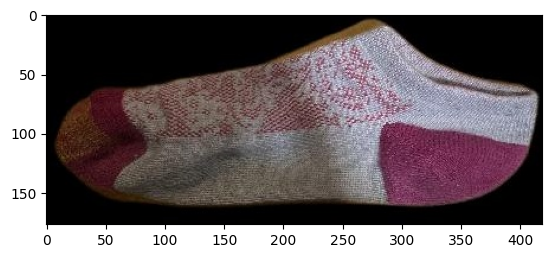

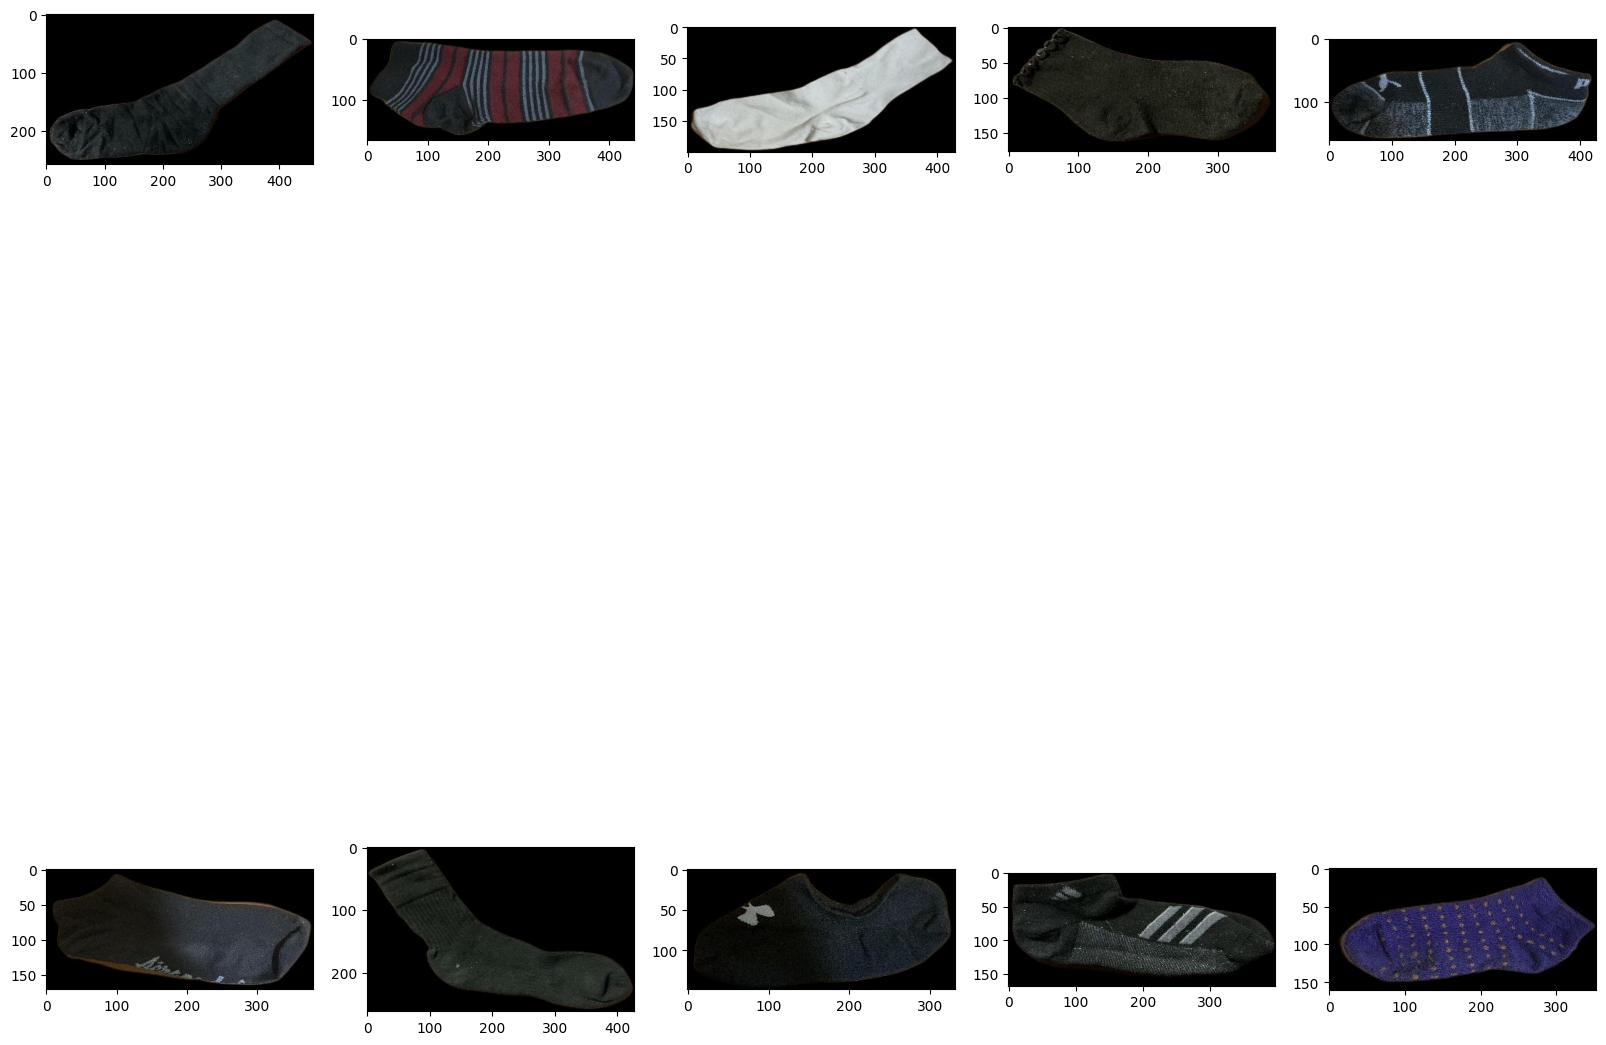

In [11]:
findMatches('./NEW_IMG_0657.jpg')


100%|██████████| 109/109 [01:07<00:00,  1.61it/s]


['NEW_IMG_0642.jpg', 0.9655745]
['NEW_IMG_0666.jpg', 0.9631591]
['NEW_IMG_0654.jpg', 0.96134394]
['IMG_0592.jpg', 0.959665]
['NEW_IMG_0641.jpg', 0.95940495]
['IMG_0565.jpg', 0.9567063]
['IMG_0602.jpg', 0.95373243]
['NEW_IMG_0643.jpg', 0.95333076]
['NEW_IMG_0667.jpg', 0.95164216]
['IMG_0604.jpg', 0.9511178]


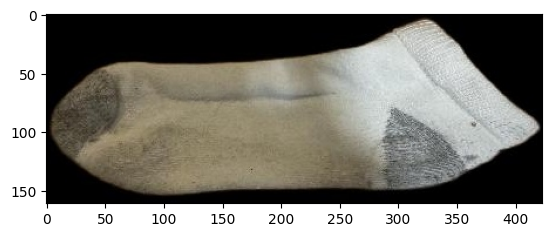

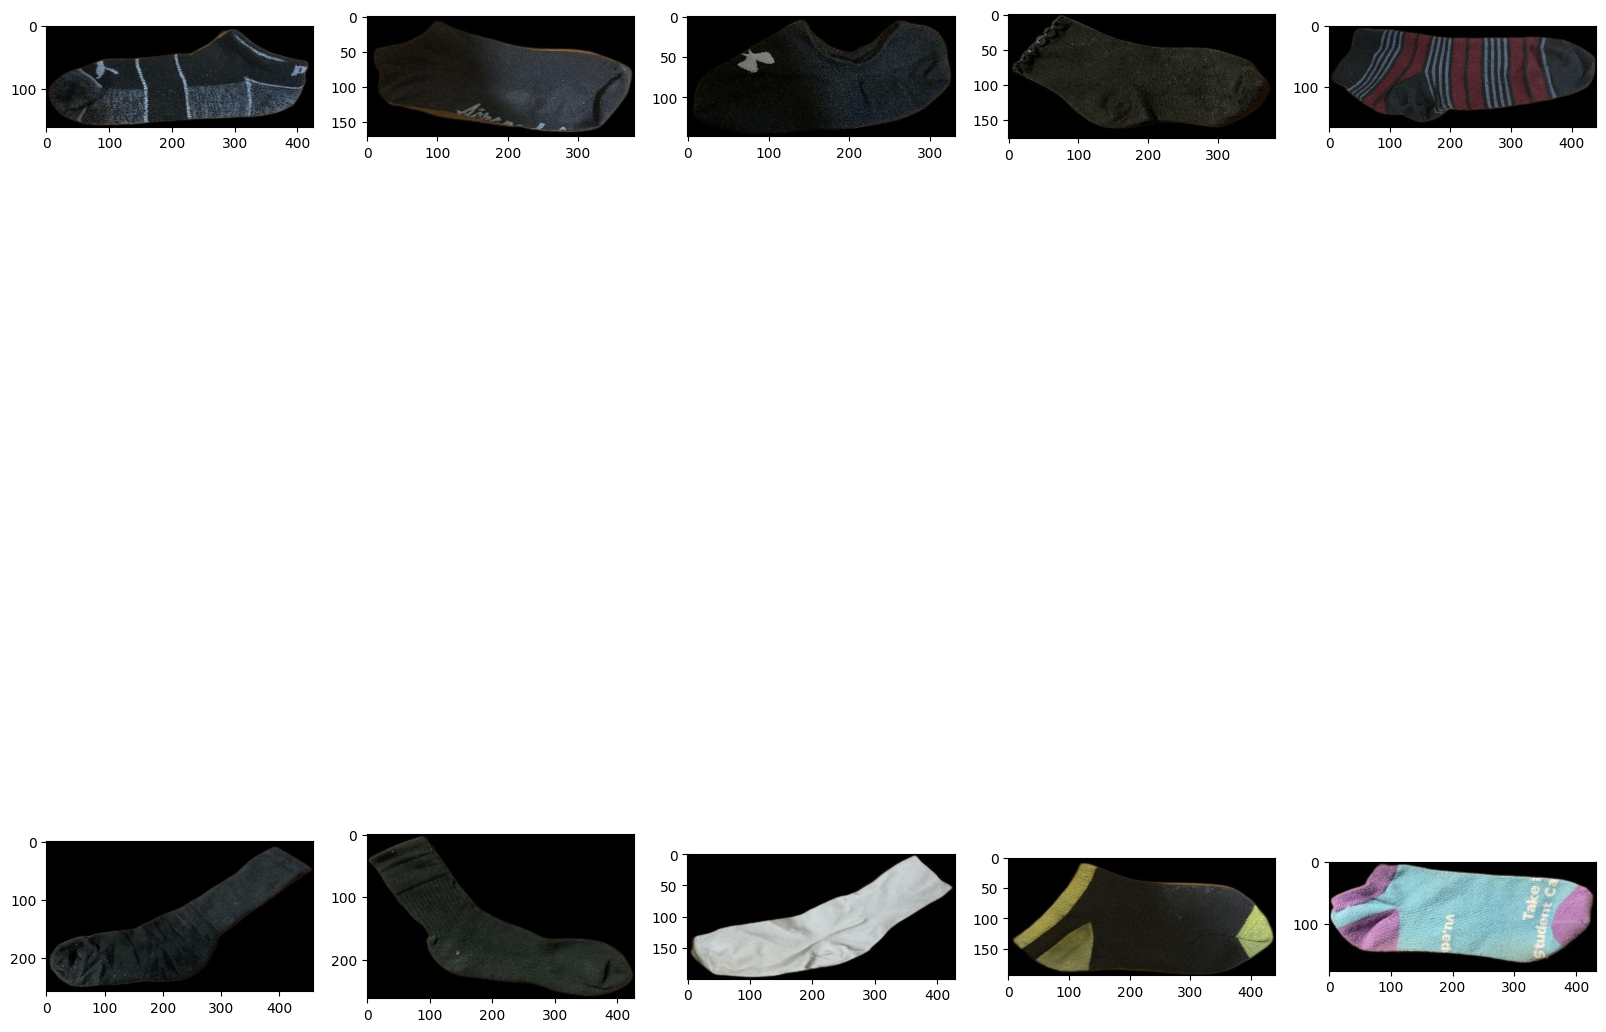

In [12]:
findMatches('./NEW_IMG_0659.jpg')
